An example using IsolationForest for anomaly detection.

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.
Random partitioning produces noticeable shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

[1]	Liu, Fei Tony, Ting, Kai Ming and Zhou, Zhi-Hua. “Isolation forest.” Data Mining, 2008. ICDM‘08. Eighth IEEE International Conference on.

### Version

In [1]:
import sklearn
sklearn.__version__

'0.19.1'

### Imports

This tutorial imports [IsolationForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest

C:\Users\RTH11374\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Generate Data

In [3]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.25 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.25 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

### Fit an Isolation Forest

In [24]:
# fit the model
clf = IsolationForest(max_samples=100, random_state=rng ,contamination=0.001)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
y_anomaly_score= clf.decision_function(X_outliers)

C:\Users\RTH11374\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: 'IsolationForest' object has no attribute 'score_samples'

### A look at the prediction

In [5]:
y_pred_outliers

array([-1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1])

In [6]:
y_pred_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [25]:
y_anomaly_score

array([-0.11288507, -0.15096277, -0.08398989, -0.10775713, -0.07581659,
       -0.10104679, -0.08379341, -0.05908968, -0.12111395, -0.05277311,
       -0.09743113, -0.12890065, -0.12890065, -0.07643302, -0.1159399 ,
       -0.10474443, -0.13331862, -0.1137538 , -0.11648044, -0.11528147])

In [7]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

### Plot Results

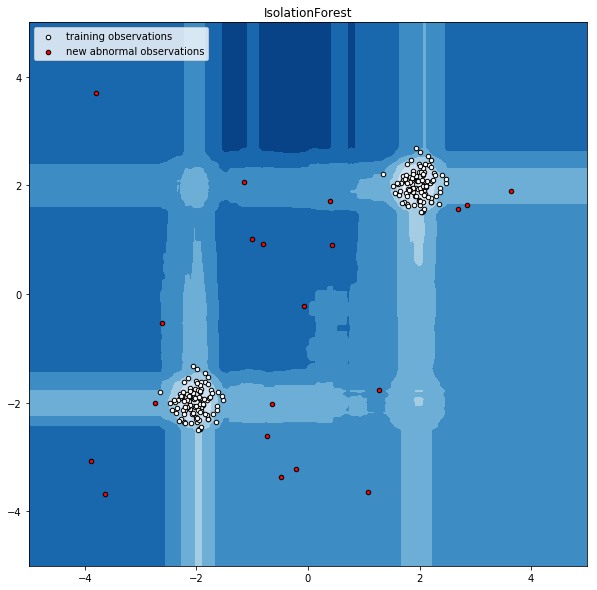

In [8]:
plt.figure(figsize=(10,10))
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')

c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, c],
           ["training observations", "new abnormal observations"],
           loc="upper left")
plt.show()

### Read new data

In [20]:
X_new=pd.read_csv('Events for anomaly.csv', index_col=1 )
X_new=X_new.iloc[:,5:]
X_new.head()

,d0,motor,l1,l2,l3,d1,d2,d3,d4,d5,...,d12,d13,d14,d15,skew,median,mean,max,peakwith,direction
date_time,,,,,,,,,,,,,,,,,,,,,
2016-10-06 00:01:23.253,345.730,C3,181.333,0.066,0.070,352.740,341.408,310.983,89.144,43.094,...,9.521,8.566,7.789,7.138,1.278090,17.137,94.840000,352.740,6.0,1
2016-10-06 00:09:54.215,335.290,C3,206.433,0.109,0.112,326.900,329.872,309.593,93.679,44.126,...,9.589,8.625,7.842,7.185,1.204803,17.320,93.946842,335.290,6.0,0
2016-10-06 00:25:36.627,275.124,C3,0.079,0.081,0.080,348.993,348.336,344.335,264.533,73.290,...,10.456,9.323,8.408,7.659,1.195748,16.484,95.750789,348.993,6.0,1
2016-10-06 00:35:25.931,334.058,C3,197.242,0.203,0.217,327.522,328.330,314.909,97.187,44.860,...,9.619,8.655,7.860,7.202,1.213703,17.423,93.907316,334.058,6.0,0
2016-10-06 00:39:24.610,340.961,C3,52.303,0.277,0.288,350.225,345.850,338.392,143.133,52.487,...,9.952,8.930,8.095,7.398,1.370695,18.484,93.272632,350.225,6.0,1


### Prepare the data

### Fit a new Isolation Forest

### Plot the distrebution of the decision function of the new Isolation Forest